In [1]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import factorial
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
from scipy.stats import norm
import math
import scipy.stats as stats
from scipy import fftpack
from scipy.signal import find_peaks
from scipy.stats import t

### 1. Hurricanes per Year
The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
* Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
* Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances

(<matplotlib.patches.Rectangle at 0x22def56afd0>,
 (<matplotlib.patches.ConnectionPatch at 0x22def58a3a0>,
  <matplotlib.patches.ConnectionPatch at 0x22def58aa60>))

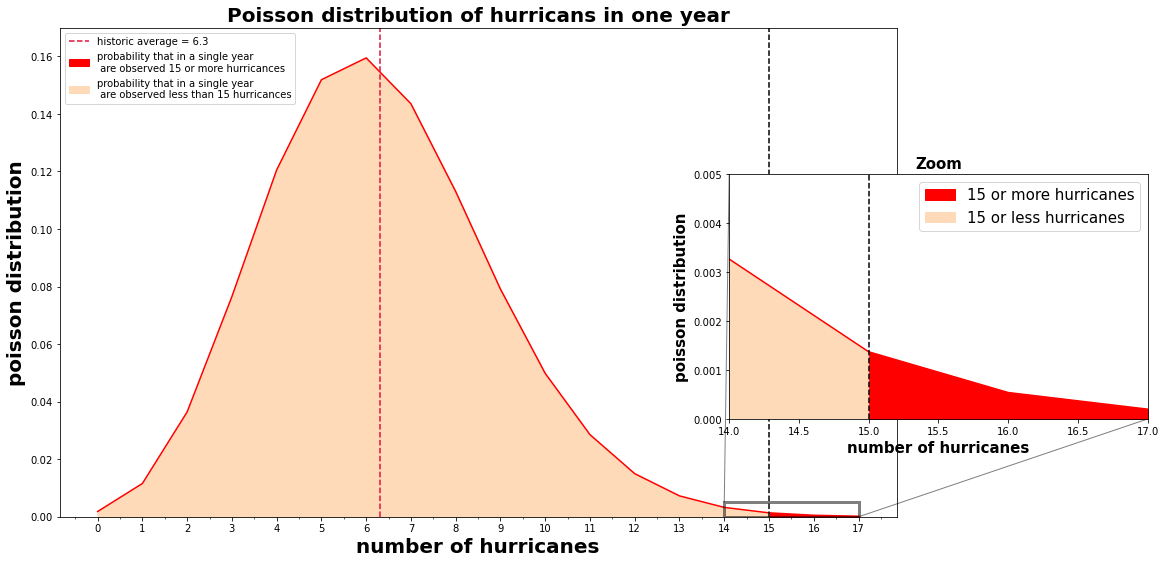

In [3]:
x0 = 15
x1 = 6.3
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,9))
x = np.linspace(0,17,18) 
y = poisson.pmf(x, 6.3)


#x_gauss = np.linspace(0, 17, 18)
#y_gauss = norm.pdf(x, 6.3, np.sqrt(6.3))

#ax.plot(x_gauss,y_gauss,color="blue")
#ax.fill_between(x_gauss,y_gauss, where= x<=x0 ,color="lightskyblue",label="gaussian")


ax.plot(x,y,color="red")
ax.xaxis.set_major_locator(MultipleLocator(1)) 
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.set_ylim(0, 0.17)
ax.set_xlabel("number of hurricanes",fontweight="bold",fontsize=20)
ax.set_ylabel("poisson distribution",fontweight="bold",fontsize=20)
ax.set_title("Poisson distribution of hurricans in one year",fontweight="bold",fontsize=20)
ax.axvline(x0, linestyle='--', color='black')
ax.axvline(x1, linestyle='--', color='crimson',label="historic average = 6.3")
ax.fill_between(x,y, where= x>= x0 ,color="red", label="probability that in a single year \n are observed 15 or more hurricances")
ax.fill_between(x,y, where= x<=x0 ,color='peachpuff',label="probability that in a single year \n are observed less than 15 hurricances")


axins = ax.inset_axes([0.8,0.2,0.5,0.5])
axins.plot(x,y,color="red")
axins.set_ylim(0, 0.005)
axins.set_xlim(14,17)
axins.axvline(x0, linestyle='--', color='black')
axins.fill_between(x,y, where= x>= x0 ,color="red",label="15 or more hurricanes")
axins.fill_between(x,y, where= x<=x0 ,color='peachpuff',label="15 or less hurricanes")
axins.set_xlabel("number of hurricanes",fontweight="bold",fontsize=15)
axins.set_ylabel("poisson distribution",fontweight="bold",fontsize=15)
axins.set_title("Zoom",fontweight="bold",fontsize=15)
ax.legend(loc="best",fontsize=10)
axins.legend(loc="best",fontsize=15)
ax.indicate_inset_zoom(axins, edgecolor="black",linewidth=3)


#mu = 6.3
#sigma = math.sqrt(mu)
#x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
#ax.plot(x, stats.norm.pdf(x, mu, sigma), color="black")


In [3]:
probability = ((1-poisson.cdf(15,6.3))*100)
print("The probability that in a single year are observed 15 or more hurricances is: ", round(probability,3),"%")

The probability that in a single year are observed 15 or more hurricances is:  0.084 %


In [4]:
Z = (15 -6.3)/(np.sqrt(6.3))
print("Z =",round(Z,3))

Z = 3.466


Considering that we have assumed as statistically significant a probability that has a Z score of 3 or larger, and the value obtained is $Z = 3.466 > 3$, we can say that 15 hurrican in one year is signficantly different.

### 2. Pairwise t-test

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

In [3]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

Determine whether the change in blood pressures within our sample was statistically significant.


(Student's $t$ test is often used in hypothesis testing to determine whether a process or treatment actually has an effect on the population of interest)

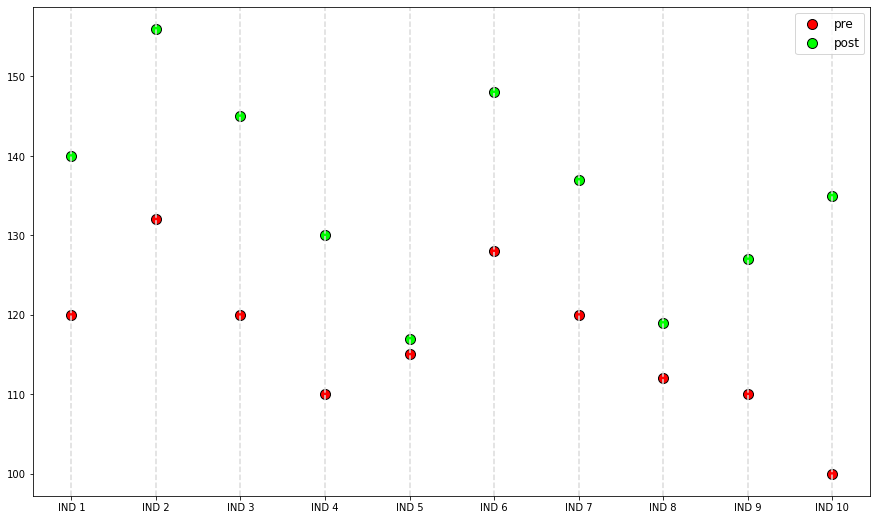

In [4]:
individuals = ["IND 1","IND 2", "IND 3", "IND 4", "IND 5", "IND 6", "IND 7", "IND 8", "IND 9", "IND 10"]
"""plt.scatter(individuals,pre)
plt.plot(individuals,pre)

plt.scatter(individuals,post)
plt.plot(individuals,post)"""

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,9))
ax.scatter(individuals,pre,color= "red",label="pre",edgecolor="black",s=100)
#ax.plot(individuals,pre,color = "orangered")
ax.scatter(individuals,post, color ="lime",label="post",edgecolor="black",s=100)
#ax.plot(individuals,post,color="lime")

for i in range(10):
    ax.axvline(i, linestyle='--',color="gainsboro")

ax.legend(loc='upper right',fontsize='large')

Paired $t$-test is a parametric approach used to compare means of two paired groups, in this case people measured before and after a treatment.
Our null hypotesis is that 

In [5]:
alfa = 0.05
df = 9
mean_pre = np.mean(pre)
mean_post = np.mean(post)
print("pre exposure mean: ",mean_pre)
print("post exposure mean: ",mean_post)

pre exposure mean:  116.7
post exposure mean:  135.4


In [6]:
sigma_pre = np.sqrt(np.var(pre, ddof=1))
sigma_post= np.sqrt(np.var(post, ddof=1))

sigma = np.sqrt((sigma_pre**2 +  sigma_post**2)/2)

T = abs((mean_pre - mean_post)/(sigma*np.sqrt(2/10)))

In [7]:
print("T value= ",round(T,3))
print("α= ",alfa)
print("degrees of freedom= ",df)

T value=  3.787
α=  0.05
degrees of freedom=  9


In the application of the t-test, we assume that the mean score for the sample is representative of the mean score for population, and likewise, that the variance for this sample of scores is an estimate of the variance for the population. We also assume, unless we have some other information, that these data were drawn from a normal distribution.

Text(0.5, 1.0, 'Zoom')

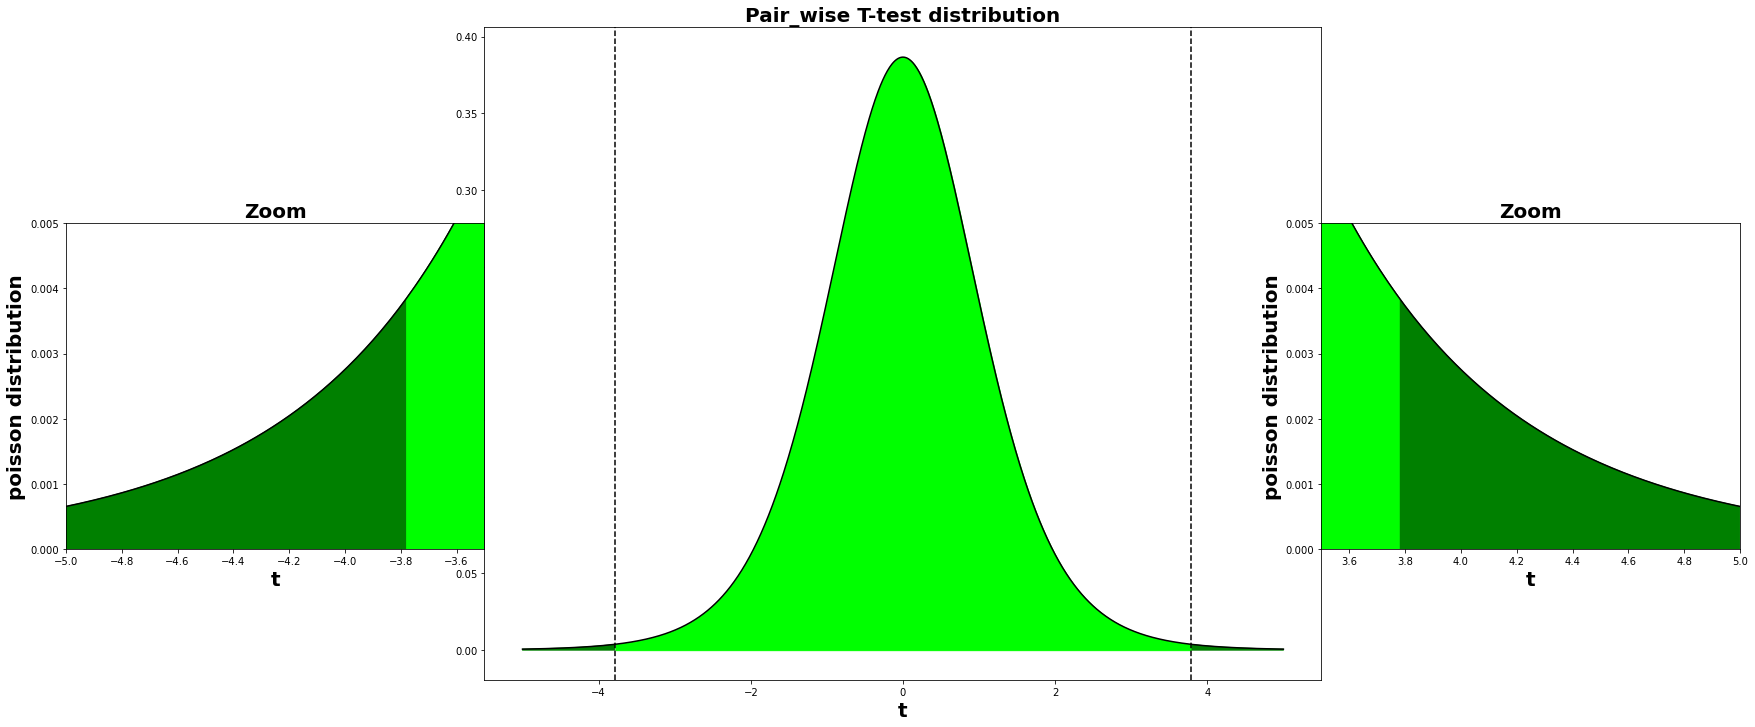

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,12))
mu = 0
sigma = 1
x = np.linspace(-5,5, 1000)
y = stats.t.pdf(x, df - 1)
ax.plot(x, y, color="black")
ax.axvline(T, linestyle='--', color='black')
ax.axvline(-T, linestyle='--', color='black')
ax.fill_between(x, y, where=np.abs(x) > np.abs(T), color='green')
ax.fill_between(x, y, where=np.abs(x) < np.abs(T), color='lime')
ax.set_xlabel("t",fontweight="bold",fontsize=20)
ax.set_title("Pair_wise T-test distribution",fontweight="bold",fontsize=20)

axins = ax.inset_axes([1,0.2,0.5,0.5])
axins.plot(x,y,color="black")
axins.set_ylim(0, 0.005)
axins.set_xlim(3.5,5)
axins.axvline(-T, linestyle='--', color='black')
axins.fill_between(x,y, where= x>= -T ,color="green")
axins.fill_between(x, y, where=np.abs(x) < np.abs(T), color='lime')
axins.set_xlabel("t",fontweight="bold",fontsize=20)
axins.set_ylabel("poisson distribution",fontweight="bold",fontsize=20)
axins.set_title("Zoom",fontweight="bold",fontsize=20)
#ax.legend(loc="best",fontsize=10)
#axins.legend(loc="best",fontsize=15)


axins = ax.inset_axes([-0.5,0.2,0.5,0.5])
axins.plot(x,y,color="black")
axins.set_ylim(0, 0.005)
axins.set_xlim(-5,-3.5)
axins.axvline(4, linestyle='-', color='black')
axins.fill_between(x,y, where= x<= T ,color="green")
axins.fill_between(x, y, where=np.abs(x) < np.abs(T), color='lime')
axins.set_xlabel("t",fontweight="bold",fontsize=20)
axins.set_ylabel("poisson distribution",fontweight="bold",fontsize=20)
axins.set_title("Zoom",fontweight="bold",fontsize=20)
#ax.legend(loc="best",fontsize=10)
#axins.legend(loc="best",fontsize=15)


In [12]:
p_value = round(2*(1-t.cdf(T,df)),3)
print("p_value =",p_value)

p_value = 0.004


The p-value is smaller than the level of significance ($5\% $), then the decision is to reject the null hypothesis, so blood pressure changes following exposure to halogen lighting

### 3.FFT of a simple dataset

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

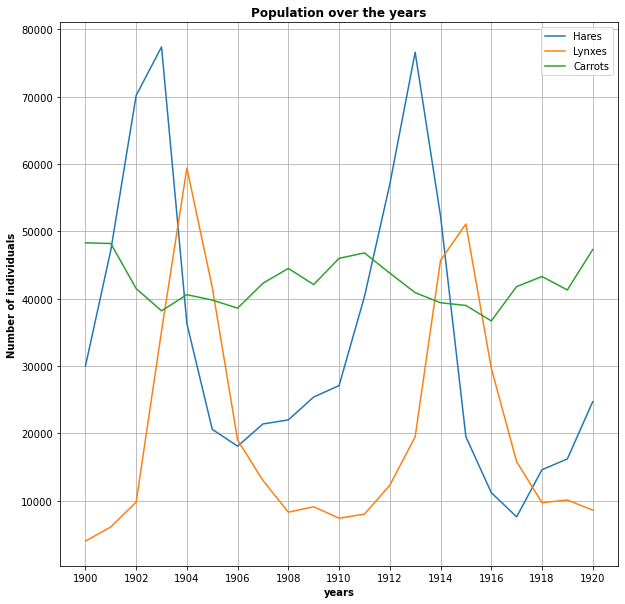

In [24]:
filename = 'population.txt'
data = np.genfromtxt(filename)

years = data[:,0]
hares = data[:,1]
lynxes = data[:,2]
carrots = data[:,3]

plt.figure(figsize=(10,10))
plt.plot(years, hares, label = 'Hares')
plt.plot(years, lynxes, label = 'Lynxes')
plt.plot(years, carrots, label = 'Carrots')
plt.legend()
plt.xlabel("years",fontweight="bold")
plt.ylabel("Number of individuals",fontweight="bold")
plt.xticks(np.arange(1900,1922, 2))
plt.title("Population over the years",fontweight="bold")
plt.grid()


The
scipy.fftpack.fftfreq() function will generate the sampling frequencies and scipy.fftpack.fft()will
compute the fast Fourier transform:

In [25]:
sample_freq = fftpack.fftfreq(years.size)


hares_fft = fftpack.fft(hares)
lynxes_fft = fftpack.fft(lynxes)
carrots_fft = fftpack.fft(carrots)

Because the resulting power is symmetric, only the positive part of the spectrum needs to be used for finding
the frequency:

In [26]:
pidxs = np.where(sample_freq > 0)

freqs = sample_freq[pidxs]

power_hares = np.abs(hares_fft)[pidxs]
power_lynxes = np.abs(lynxes_fft)[pidxs]
power_carrots = np.abs(carrots_fft)[pidxs]

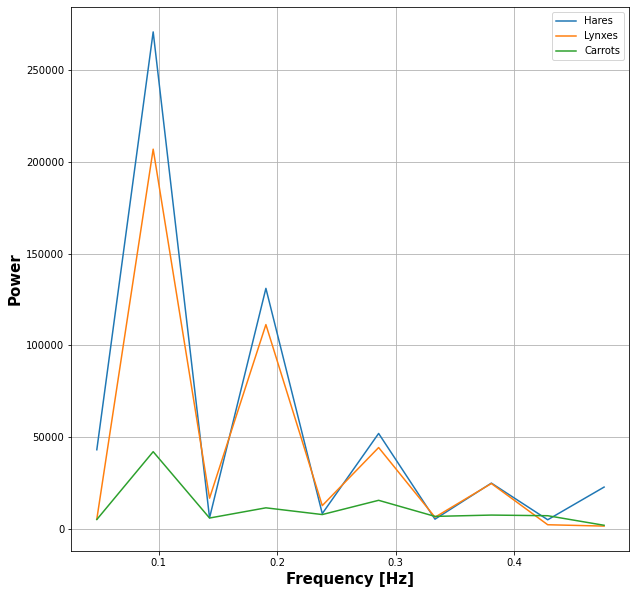

In [27]:
plt.figure(figsize=(10,10))
plt.plot(freqs, power_hares, label = 'Hares')
plt.plot(freqs, power_lynxes, label = 'Lynxes')
plt.plot(freqs, power_carrots, label = 'Carrots')
plt.legend()
plt.xlabel("Frequency [Hz]",fontweight="bold",fontsize=15)
plt.ylabel("Power",fontweight="bold",fontsize=15)
plt.grid()

The peak is the same for the three dataset, so it is possible to find the period of the data. The peak in frequency is the inverse of the period: $\nu_{peak} = \frac{1}{T}$

In [33]:
T=1/freqs[1]
print('The period is',T, 'years')

The period is 10.5 years


The signal frequency can be found by:

In [28]:
freq_hares = freqs[power_hares.argmax()]
freq_lynxes= freqs[power_lynxes.argmax()]
freq_carrots = freqs[power_carrots.argmax()]

Now the high-frequency noise will be removed from the Fourier transformed signal:

In [29]:
hares_fft[np.abs(sample_freq) > freq_hares] = 0
lynxes_fft[np.abs(sample_freq) > freq_lynxes] = 0
carrots_fft[np.abs(sample_freq) > freq_carrots] = 0

The resulting filtered signal can be computed by the scipy.fftpack.ifft() function:

In [30]:
main_hares = fftpack.ifft(hares_fft)
main_lynxes = fftpack.ifft(lynxes_fft)
main_carrots = fftpack.ifft(carrots_fft)

The result can be viewed:

C:\Users\Utente\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Utente\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Utente\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Population over the years (filtered signal)')

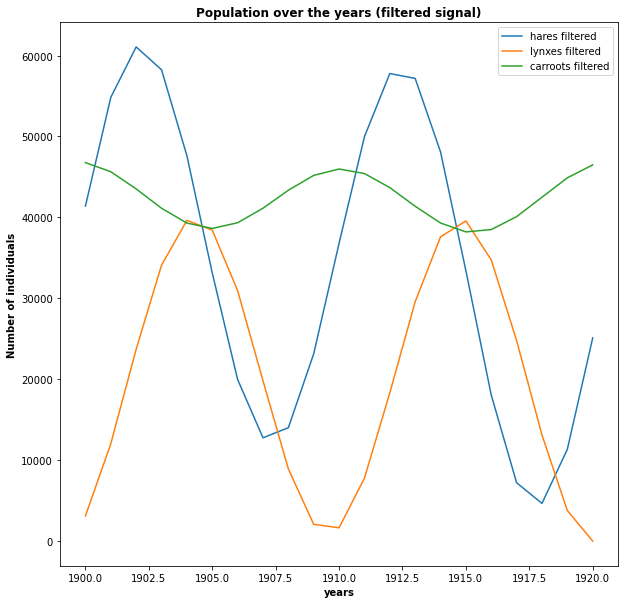

In [31]:
plt.figure(figsize=(10,10))
plt.plot(years, main_hares,label="hares filtered")
plt.plot(years, main_lynxes,label="lynxes filtered")
plt.plot(years, main_carrots,label="carroots filtered")
plt.legend(loc="best")
plt.ylabel("Number of individuals",fontweight="bold")
plt.xlabel("years",fontweight="bold")
plt.title("Population over the years (filtered signal)",fontweight="bold")

### 4. FFT of an image

* Examine the provided image moonlanding.png, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
* Load the image using pylab.imread().
* Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
* The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
* Apply the inverse Fourier transform to see the resulting image.

In [16]:
from scipy import fftpack
import pylab as pyl
from matplotlib.colors import LogNorm
import sympy as smp
from skimage import color
from skimage import io
from scipy.fft import fftfreq
from scipy.fft import fft, ifft, fft2, ifft2

(-0.5, 629.5, 473.5, -0.5)

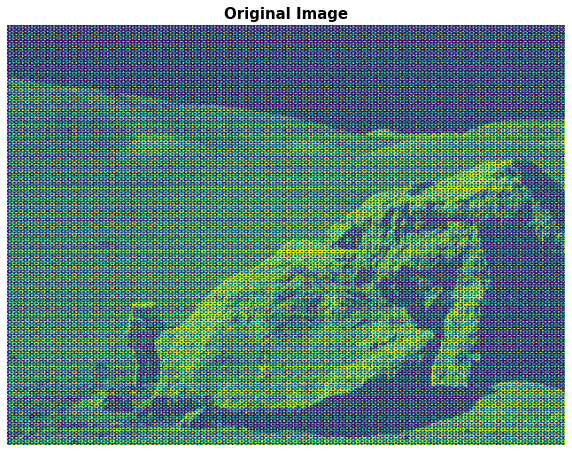

In [17]:
image = plt.imread('moonlanding.png')

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(image)
ax.set_title("Original Image",fontweight="bold",fontsize=15)
plt.axis('off')

(-0.5, 629.5, 473.5, -0.5)

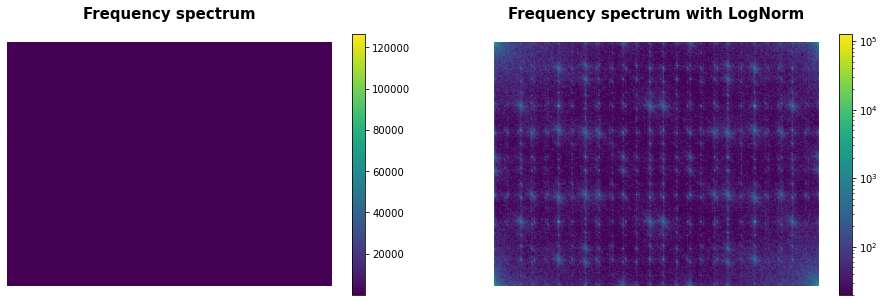

In [18]:
#fft of the signal
im_fft = fftpack.fft2(image)
im_real = np.abs(im_fft)

#spectrum plot
from matplotlib import colors
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,16))
spec1=ax1.imshow(im_real)
ax1.set_title('Frequency spectrum\n',fontweight="bold",fontsize=15)
fig.colorbar(spec1,ax=ax1,shrink=0.30);
spec2=ax2.imshow(im_real, norm=colors.LogNorm(vmin=20))
ax2.set_title('Frequency spectrum with LogNorm\n',fontweight="bold",fontsize=15)
fig.colorbar(spec2,ax=ax2,shrink=0.30);
ax1.axis('off')
ax2.axis('off')

The spectrum is well visible only using the logarithmic scale.

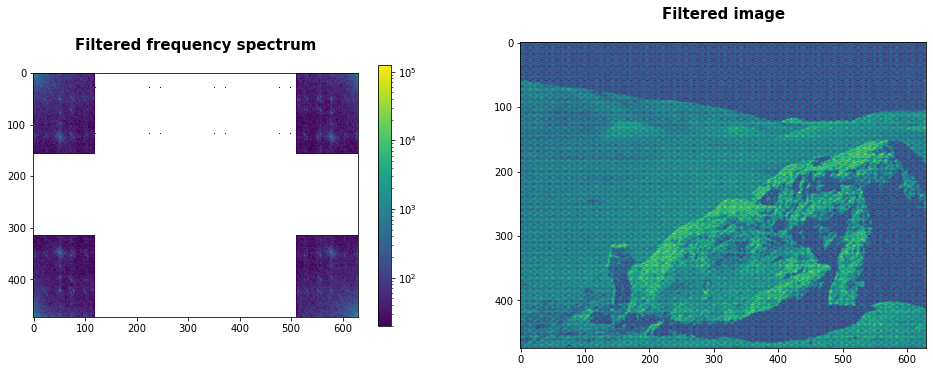

In [22]:
#filtering the image
fil_fft=im_fft.copy()

col, row = fil_fft.shape
q=0.25

fil_fft[int(row*q):int((1-row)*q),:]=0
fil_fft[:,int(col*q):int((1-col)*q)]=0


fil_real= np.abs(fil_fft)
filtered = np.abs(fftpack.ifft2(fil_fft))

#spectrum plot
from matplotlib import colors
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,16))
spec=ax1.imshow(fil_real, norm=colors.LogNorm(vmin=20))
ax1.set_title('Filtered frequency spectrum\n', fontweight="bold",fontsize=15)
fig.colorbar(spec,ax=ax1,shrink=0.30)
ax2.set_title('Filtered image\n',fontweight="bold",fontsize=15)
ax2.imshow(filtered);